In [1]:
import numpy as np
import matplotlib.pylab as plt
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn import metrics
import sklearn

In [10]:
df = pd.read_csv('final_cleaned_df.csv')
df = df.drop(columns = ["Unnamed: 0"])
df.head()

,Price,CouncilArea,MonthsSince2016,BuildingAge,Landsize,BuildingArea,Lattitude,Longtitude,Type,Rooms,Distance,Bathroom,Car
0,1035000,31,2,116,156,79.0,-37.8079,144.9934,1,2,2.5,1,0
1,1465000,31,15,117,134,150.0,-37.8093,144.9944,1,3,2.5,2,0
2,1600000,31,6,2,120,142.0,-37.8072,144.9941,1,4,2.5,1,2
3,1876000,31,5,106,245,210.0,-37.8024,144.9993,1,3,2.5,2,0
4,1636000,31,10,126,256,107.0,-37.8060,144.9954,1,2,2.5,1,2


In [11]:
Price = df.loc[:,['Price']]
Price.describe()

,Price
count,6.824000e+03
mean,1.077712e+06
std,6.735852e+05
min,1.310000e+05
25%,6.300000e+05
50%,8.900000e+05
75%,1.335000e+06
max,9.000000e+06


In [12]:
from scipy import stats

z_scores = stats.zscore(df)
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 5).all(axis = 1)

df = df[filtered_entries]
print(df)

        Price  CouncilArea  MonthsSince2016  BuildingAge  Landsize  \
0     1035000           31                2          116       156   
1     1465000           31               15          117       134   
2     1600000           31                6            2       120   
3     1876000           31                5          106       245   
4     1636000           31               10          126       256   
...       ...          ...              ...          ...       ...   
6819   650000            1               20           11       210   
6820   635000            1               20           37       662   
6821  1031000            1               20           22       333   
6822  2500000            1               20           97       866   
6823  1285000            1               20           97       362   

      BuildingArea  Lattitude  Longtitude  Type  Rooms  Distance  Bathroom  \
0             79.0  -37.80790   144.99340     1      2       2.5         1   
1  

In [13]:
X = df.drop(columns = ["Price"])
y = df['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [14]:
X.describe()

,CouncilArea,MonthsSince2016,BuildingAge,Landsize,BuildingArea,Lattitude,Longtitude,Type,Rooms,Distance,Bathroom,Car
count,6721.000000,6721.000000,6721.000000,6721.000000,6721.000000,6721.000000,6721.000000,6721.000000,6721.000000,6721.000000,6721.000000,6721.000000
mean,15.229728,13.005505,52.013242,438.939890,140.197370,-37.807936,144.991705,1.541140,2.969796,10.110400,1.584288,1.592025
std,9.875937,5.366630,36.417989,418.979673,72.027769,0.079203,0.104188,0.833352,0.957961,5.817449,0.695061,0.906272
min,1.000000,2.000000,0.000000,0.000000,0.000000,-38.164920,144.542370,1.000000,1.000000,0.000000,1.000000,0.000000
25%,5.000000,8.000000,17.000000,164.000000,93.000000,-37.856800,144.925400,1.000000,2.000000,6.100000,1.000000,1.000000
50%,17.000000,12.000000,47.000000,400.000000,125.000000,-37.801700,144.996700,1.000000,3.000000,9.200000,1.000000,2.000000
75%,24.000000,18.000000,76.000000,633.000000,171.000000,-37.756400,145.056030,2.000000,4.000000,13.000000,2.000000,2.000000
max,32.000000,21.000000,186.000000,5042.000000,575.000000,-37.512320,145.445300,3.000000,7.000000,39.800000,5.000000,6.000000


In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y)

In [16]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

RFR = RandomForestRegressor()
RFR.fit(X_train, y_train)
y_pred = RFR.predict(X_test)
MAE = mean_absolute_error(y_test, y_pred)

print('MAE (Random Forest):')
print(MAE)

MAE (Random Forest):
154384.4436347412


In [19]:
from sklearn.linear_model import LinearRegression

REG = LinearRegression()
REG.fit(X_train, y_train)
y_REG_pred = REG.predict(X_test)

MAE_REG = mean_absolute_error(y_test, y_REG_pred)

print('MAE (Linear Regression):')
print(MAE_REG)

MAE (Linear Regression):
244638.3248674399


ValueError: x and y must be the same size

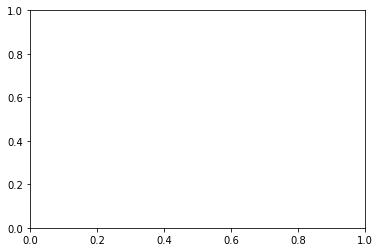